In [42]:
!pip install quandl
import quandl

In [43]:
df = quandl.get('WIKI/AAPL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [44]:
df.to_csv('AAPL.csv')

In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
2,1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
3,1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
4,1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
9396,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
9397,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
9398,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0


In [47]:
df1 = df.reset_index()['Close']
df1

0        28.750
1        27.250
2        25.250
3        25.870
4        26.630
         ...   
9395    171.270
9396    168.845
9397    164.940
9398    172.770
9399    168.340
Name: Close, Length: 9400, dtype: float64

In [48]:
df1.shape

(9400,)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

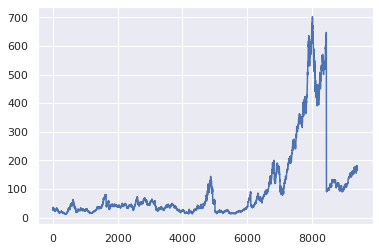

In [50]:
plt.plot(df1)

In [51]:
# LSTM are very sensitive to the scale of the data, so we apply a minmax scaler

In [52]:
import numpy as np

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
df1.shape

(9400, 1)

In [55]:
# splitting the dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

In [56]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY =[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [57]:
time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [58]:
X_train.shape, y_train.shape

((6479, 100), (6479,))

In [59]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [60]:
# create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
102/102 [==============================] - 6s 27ms/step - loss: 1.2802e-04 - accuracy: 1.5434e-04 - val_loss: 0.0027 - val_accuracy: 3.6778e-04
Epoch 2/100
102/102 [==============================] - 2s 16ms/step - loss: 3.9144e-05 - accuracy: 1.5434e-04 - val_loss: 0.0020 - val_accuracy: 3.6778e-04
Epoch 3/100
102/102 [==============================] - 2s 16ms/step - loss: 3.1172e-05 - accuracy: 1.5434e-04 - val_loss: 0.0034 - val_accuracy: 3.6778e-04
Epoch 4/100
102/102 [==============================] - 2s 16ms/step - loss: 2.9158e-05 - accuracy: 1.5434e-04 - val_loss: 0.0019 - val_accuracy: 3.6778e-04
Epoch 5/100
102/102 [==============================] - 2s 16ms/step - loss: 2.7547e-05 - accuracy: 1.5434e-04 - val_loss: 0.0038 - val_accuracy: 3.6778e-04
Epoch 6/100
102/102 [==============================] - 2s 16ms/step - loss: 2.4183e-05 - accuracy: 1.5434e-04 - val_loss: 0.0021 - val_accuracy: 3.6778e-04
Epoch 7/100
102/102 [==============================] - 2s 16ms/s

In [64]:
# predicting the outputs
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [65]:
# transforming back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
# calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

42.513625124059494

In [67]:
math.sqrt(mean_squared_error(y_test, test_predict))

289.9769108566177

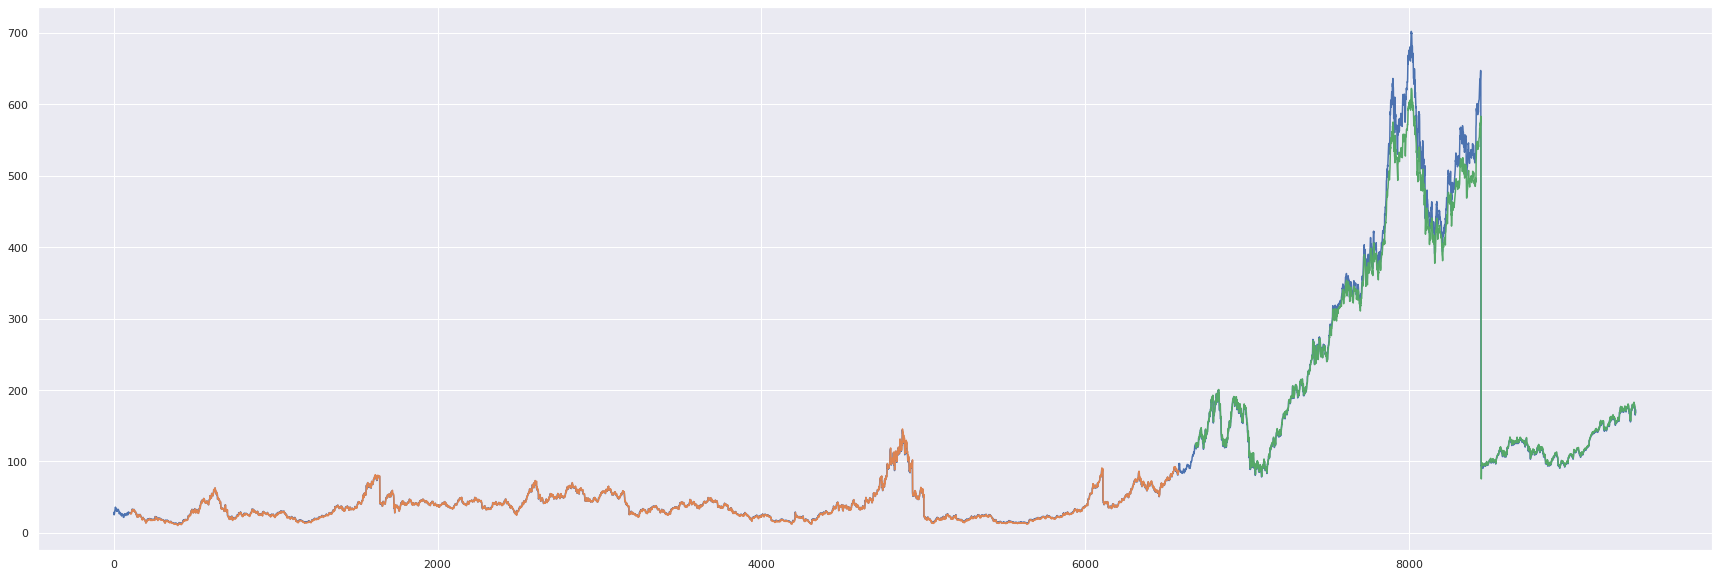

In [74]:
# plotting
# shift train predicts for plotting
plt.rcParams["figure.figsize"] = (30,10)

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] =train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] =test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# predicting future values

In [75]:
len(test_data)

2820

In [76]:
x_input=test_data[2720:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
x_input=test_data[2720:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
# predicting next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1, n_steps,1))

    yhat = model.predict(x_input, verbose=0)
    print("{} day input {}".format(i,yhat))

    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.22984737]
101
1 day input [0.22556794 0.22733324 0.23368543 0.23621762 0.23702793 0.23857618
 0.23682535 0.23581247 0.23200695 0.2287368  0.23165967 0.23028505
 0.23003907 0.23461149 0.23724497 0.23725944 0.23598611 0.2345102
 0.22931558 0.2327449  0.23158732 0.22977861 0.2295471  0.22863551
 0.22927507 0.22915642 0.23393141 0.23252785 0.23335263 0.23328028
 0.23566778 0.23935755 0.23663724 0.23636232 0.23731732 0.23731732
 0.23089278 0.23093619 0.23163073 0.22895384 0.23333816 0.23329475
 0.23445232 0.23730285 0.23636232 0.23633338 0.2362755  0.237708
 0.24032701 0.23902474 0.24323542 0.24346694 0.24230936 0.24019679
 0.24025467 0.23617422 0.23167414 0.23225293 0.22711619 0.22568369
 0.2263493  0.22685574 0.2161337  0.21196643 0.21998264 0.21493272
 0.20882651 0.20976704 0.21951961 0.22187817 0.22626248 0.23439444
 0.23358414 0.2327449  0.23161626 0.23383013 0.23810592 0.24304732
 0.24220807 0.24181739 0.23730285 0.23905368 0.23993633 0.23971929
 0.23734626 0.24010997 0.24450875 0.

In [82]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [83]:
import matplotlib.pyplot as plt

In [88]:
len(df1)

9400

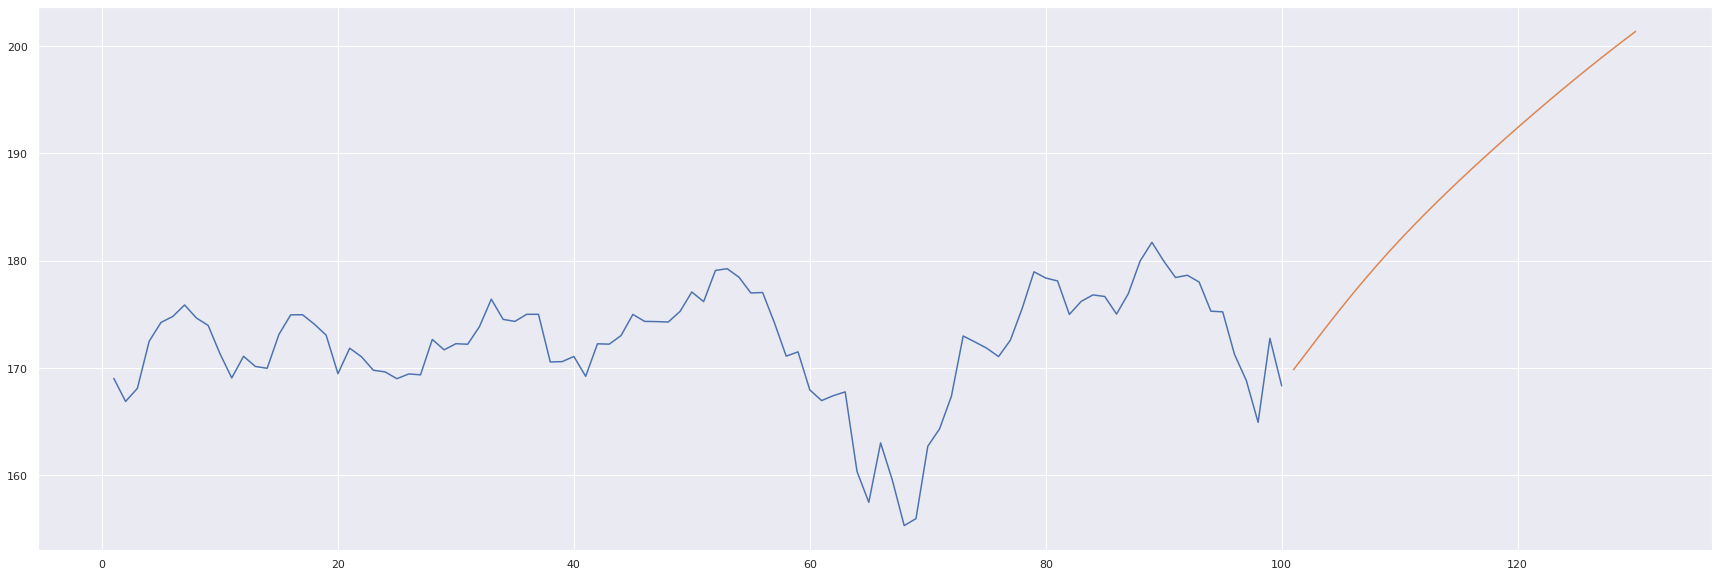

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[9300:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

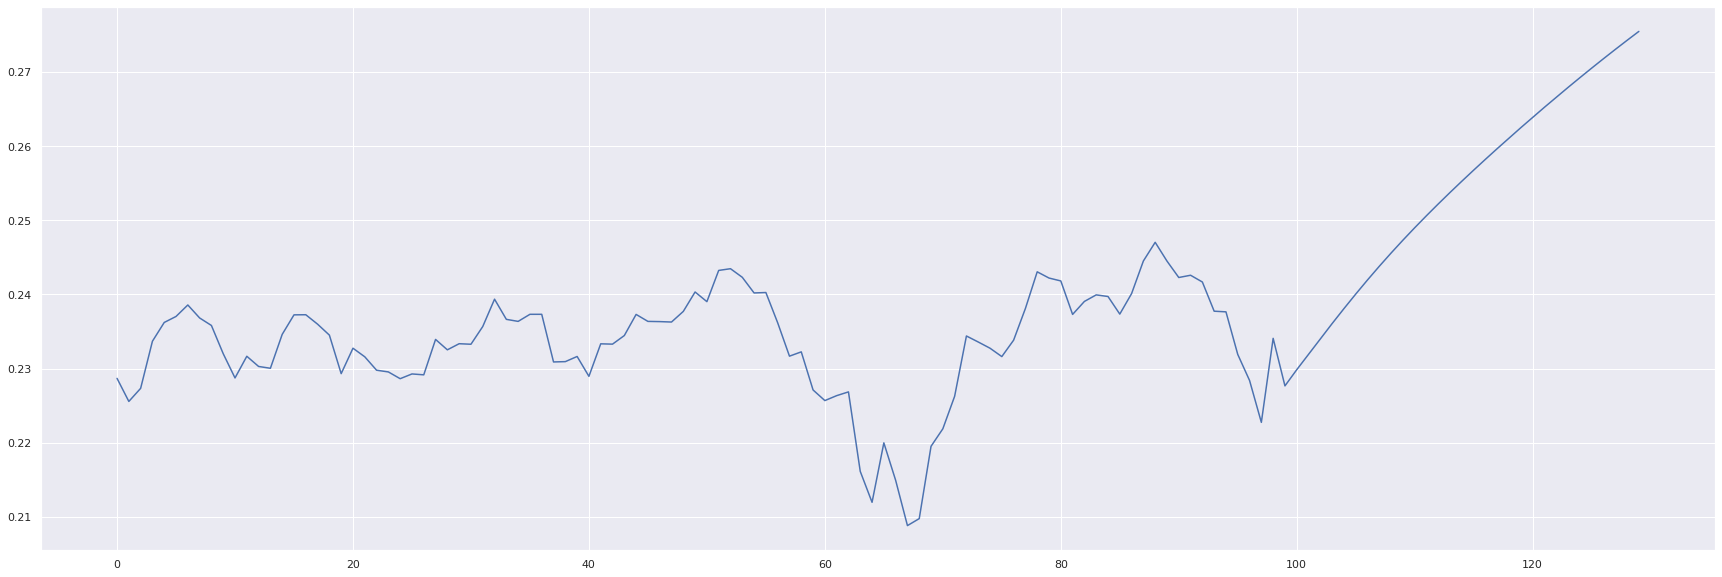

In [99]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[9300:])

In [91]:
df3=scaler.inverse_transform(df3).tolist()

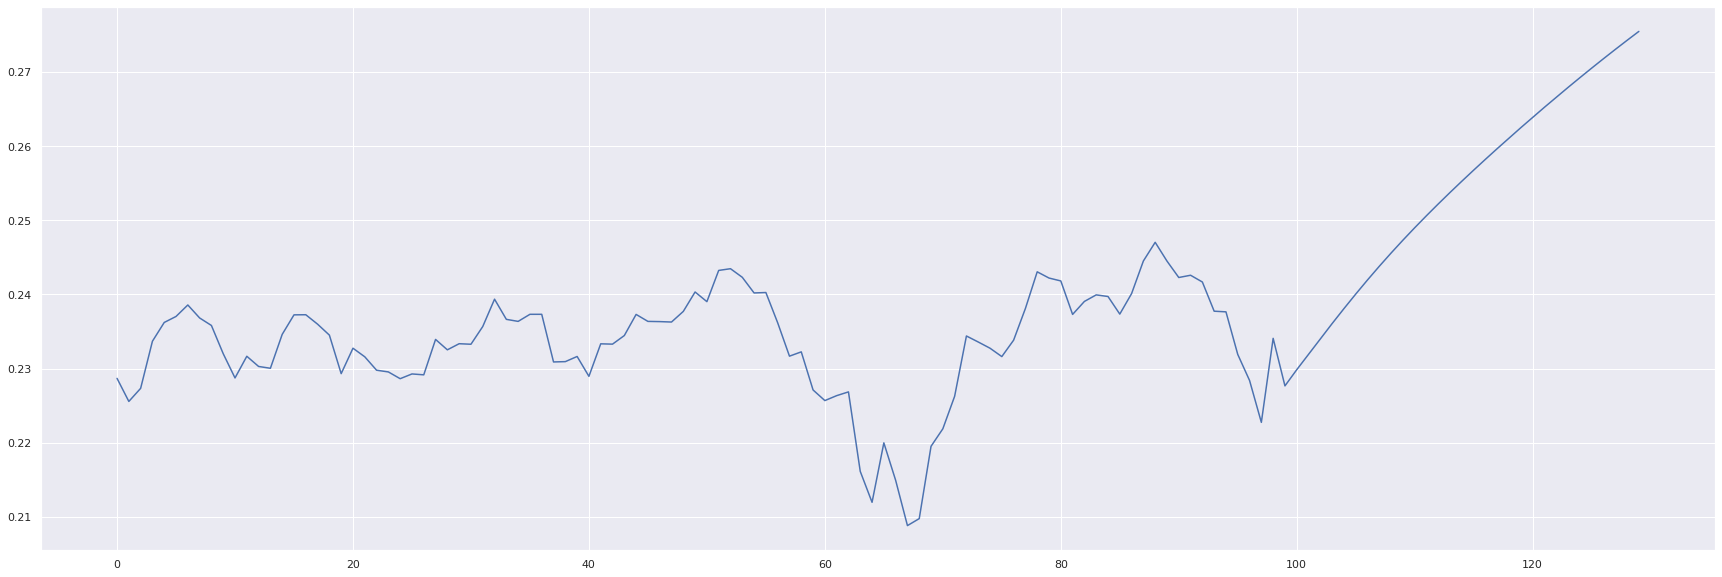

In [105]:
plt.plot(df3[9300:])